In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [4]:
git clone https://github.com/git/git.git
!git clone https://github.com/git/git.git

#git add file1.c file2.c
#git commit -m "Added a new feature"
#git push origin master
#git pull origin master
#git checkout -b my-feature-branch


SyntaxError: invalid syntax (1030168997.py, line 1)

In [2]:
data = pd.read_csv(r"D:\Crop_recommendation.csv")

In [3]:
data.shape

(2200, 8)

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
data.groupby(['label']).mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [8]:
x=data.drop(['label'],axis=1)

In [9]:
y=data['label']

In [10]:
@interact
def summary(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print(data.groupby(['label']).agg({conditions : ['mean','max','min']}))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [11]:
@interact
def sumary(con=['N','P','K','temperature','humidity','ph','rainfall']):
    print("crops which need more than average",con,'\n')
    print(data[data[con]>data[con].mean()]['label'].unique())
    print(".............................................")
    print("crops which need less than avg",con,'\n')
    print(data[data[con]<data[con].mean()]['label'].unique())

interactive(children=(Dropdown(description='con', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph', 'ra…

In [12]:
print("Summer Crop")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print("winter Crop")
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print("Rainy Crop")
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Crop
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
winter Crop
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crop
['rice' 'papaya' 'coconut']


C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\1246279592.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['K'], color='red')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\1246279592.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P'], color='blue')
C:\Users\DELL\AppData\Lo

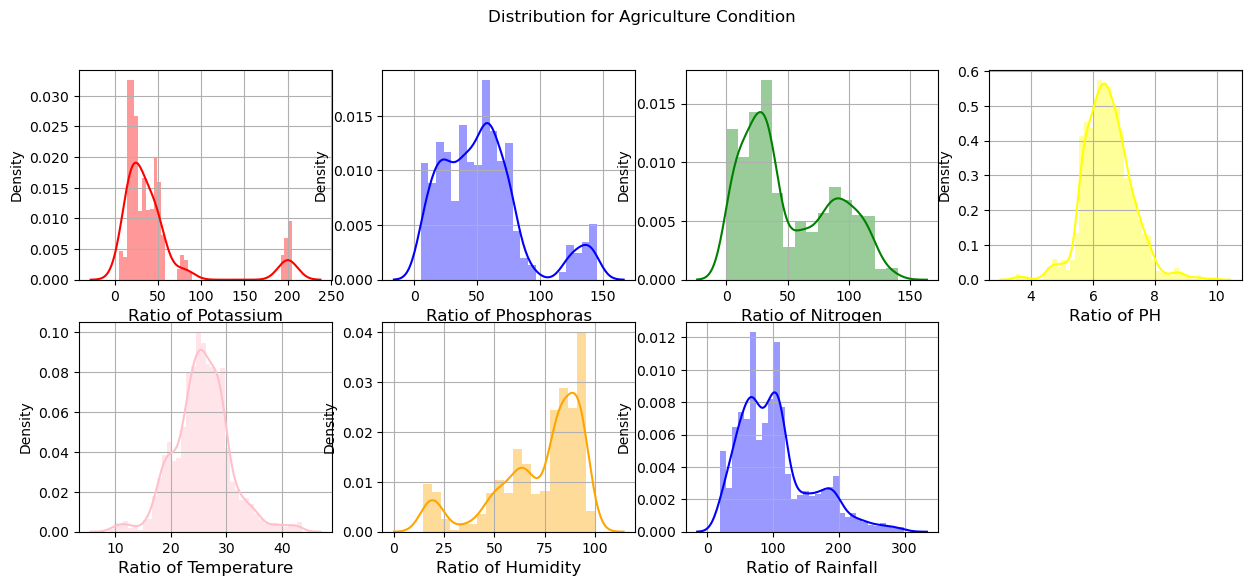

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.rcParams['figure.figsize'] = (15, 6)

# Create a 2x4 grid of subplots
plt.subplot(2, 4, 1)
sns.distplot(data['K'], color='red')
plt.xlabel('Ratio of Potassium', fontsize=12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color='blue')
plt.xlabel('Ratio of Phosphoras', fontsize=12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['N'], color='green')
plt.xlabel("Ratio of Nitrogen", fontsize=12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['ph'], color='yellow')
plt.xlabel("Ratio of PH", fontsize=12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['temperature'], color='pink')
plt.xlabel('Ratio of Temperature', fontsize=12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color='orange')
plt.xlabel('Ratio of Humidity', fontsize=12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['rainfall'], color='blue')
plt.xlabel("Ratio of Rainfall", fontsize=12)
plt.grid()

# Add a super title for the entire figure
plt.suptitle("Distribution for Agriculture Condition")

# Display the plot
plt.show()


In [14]:
from sklearn.cluster import KMeans

In [15]:
x=x.values
x.shape

(2200, 7)

In [16]:
import sklearn.preprocessing as preprocessing
data_scaled=preprocessing.scale(x,axis=0)

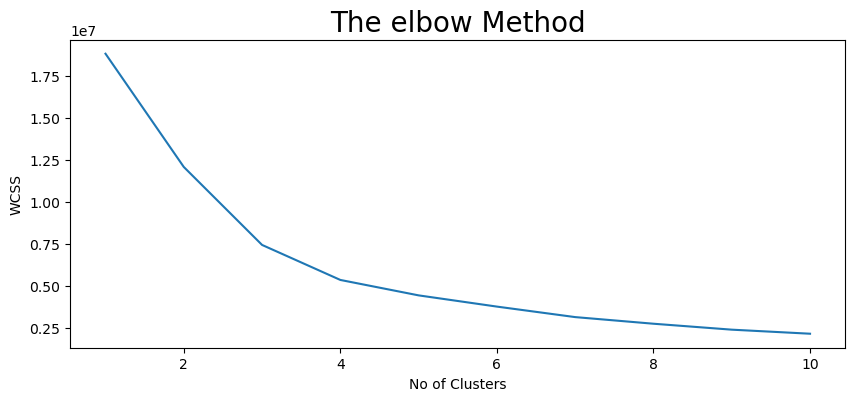

In [17]:
plt.rcParams['figure.figsize']=(10,4)
wcss=[ ]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit(x)

In [19]:
y_pre=y_means.predict(x)

In [20]:
y_pre=pd.DataFrame(y_pre)
z=pd.concat([y_pre,y],axis=1)
z=z.rename(columns={0:'Clusters'})

In [21]:
print("Crops in first cluster")
print(z[z['Clusters']==0]['label'].unique())
print("Crops in second cluster")
print(z[z['Clusters']==1]['label'].unique())
print("Crops in third cluster")
print(z[z['Clusters']==2]['label'].unique())
print("Crops in fourth cluster")
print(z[z['Clusters']==3]['label'].unique())

Crops in first cluster
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in second cluster
['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in third cluster
['grapes' 'apple']
Crops in fourth cluster
['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

NameError: name 'x1' is not defined

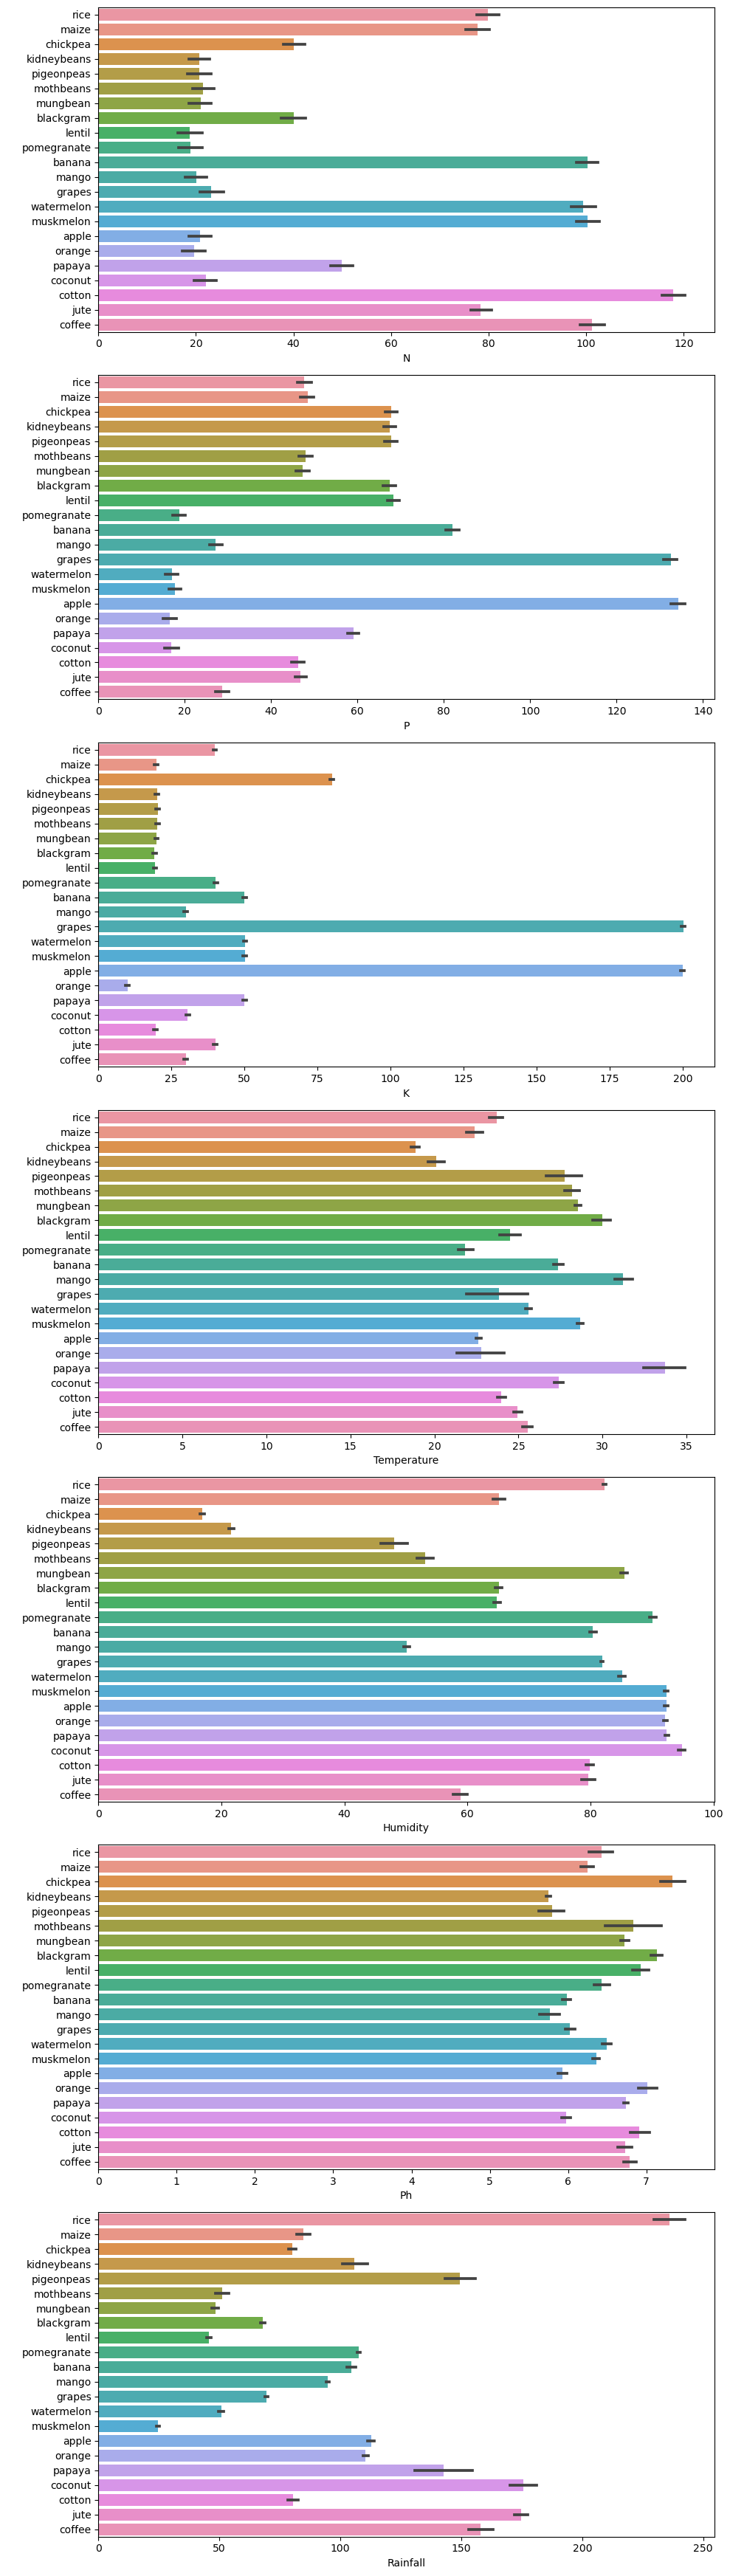

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
num_plots = len(features)

fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots))

for idx, feature in enumerate(features):
    ax = axes[idx]
    sns.barplot(data=data, x=feature, y='label', ax=ax)
    ax.set_ylabel(' ')
    ax.set_xlabel(feature.capitalize())

plt.tight_layout()
plt.show()

In [24]:
x = data.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [26]:
y = data['label']
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [27]:
print('shape of x:', x.shape)
print('shape of y:', y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


In [28]:
y.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train,y_train)
y_pred1 = clf_knn.predict(x_test)
print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred1))

from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(x_train,y_train)
y_pred2 = clf_svc.predict(x_test)
print("Accuracy Score of SVC:",accuracy_score(y_test,y_pred2))

from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf_dtc.fit(x_train,y_train)
y_pred3 = clf_dtc.predict(x_test)
print("Accuracy Score of decision tree:",accuracy_score(y_test,y_pred3))

from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=1)
clf_rfc.fit(x_train, y_train)
y_pred4 = clf_rfc.predict(x_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_pred4))

Accuracy Score of KNN: 0.9772727272727273
Accuracy Score of SVC: 0.9772727272727273
Accuracy Score of decision tree: 0.9931818181818182
Accuracy Score of Random Forest: 0.9977272727272727


In [33]:
y_train_pred = clf_rfc.predict(x_train)
print("Accuracy Score of Random Forest:",accuracy_score(y_train,y_train_pred))

Accuracy Score of Random Forest: 1.0


In [34]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred4})
output.head()

,Real_class,Predicted_class
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram


In [35]:
input = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
clf_rfc.predict(input)

C:\ProgramData\anaconda3\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)

In [36]:
output.to_csv('Optimizing Agricultural Production.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
